In [ ]:
import numpy as np

BYTES_PER_PIXEL = 4

class ImageData:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.data = np.zeros((width * height * BYTES_PER_PIXEL), dtype=np.uint8)

def index_for_pixel_location(image_data, x, y):
    return (y * image_data.width + x) * BYTES_PER_PIXEL

def pixel_location_for_index(image_data, idx):
    pixel_idx = idx // BYTES_PER_PIXEL
    y = pixel_idx // image_data.width
    x = pixel_idx % image_data.width
    return { 'x': x, 'y': y }

def fill_pixel(image_data, x, y):
    idx = index_for_pixel_location(image_data, x, y)
    image_data.data[idx + 0] = 0   # Red
    image_data.data[idx + 1] = 0   # Green
    image_data.data[idx + 2] = 0   # Blue
    image_data.data[idx + 3] = 255 # Alpha

def fill_rectangle(image_data, x1, y1, width, height):
    for y in range(y1, y1 + height):
        for x in range(x1, x1 + width):
            fill_pixel(image_data, x, y)
def lerp(a, b, t):
    return a * (1.0 - t) + b * t

def draw(image_data, secs):
    startX = 1
    endX = 38
    x = int(lerp(startX, endX, secs))
    y = 1
    fill_rectangle(image_data, x, y, 8, 8)


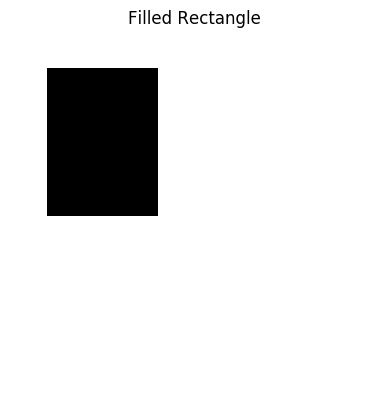

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 기본 상수
BYTES_PER_PIXEL = 4

# ImageData 클래스
class ImageData:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.data = np.zeros((width * height * BYTES_PER_PIXEL), dtype=np.uint8)

def index_for_pixel_location(image_data, x, y):
    return (y * image_data.width + x) * BYTES_PER_PIXEL

def pixel_location_for_index(image_data, idx):
    pixel_idx = idx // BYTES_PER_PIXEL
    y = pixel_idx // image_data.width
    x = pixel_idx % image_data.width
    return { 'x': x, 'y': y }

def fill_pixel(image_data, x, y):
    idx = index_for_pixel_location(image_data, x, y)
    image_data.data[idx + 0] = 0   # Red
    image_data.data[idx + 1] = 0   # Green
    image_data.data[idx + 2] = 0   # Blue
    image_data.data[idx + 3] = 255 # Alpha

def fill_rectangle(image_data, x1, y1, width, height):
    for y in range(y1, y1 + height):
        for x in range(x1, x1 + width):
            fill_pixel(image_data, x, y)

# 이미지 생성 및 사각형 채우기
img = ImageData(100, 100)
fill_rectangle(img, 10, 10, 30, 40)  # (x1, y1, width, height)

# 데이터를 (H, W, 4)로 reshape
rgba_array = img.data.reshape((img.height, img.width, 4))

# matplotlib으로 시각화
plt.imshow(rgba_array)
plt.title("Filled Rectangle")
plt.axis("off")
plt.show()
